<a href="https://colab.research.google.com/github/Doc889/personality_prediction/blob/main/personality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('train.csv', index_col='id')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


## Проверка на пустые значения

In [3]:
df.isnull().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [4]:
sns.set_style('darkgrid')
sns.set_palette('pastel')

## Заполним пустые значения

In [5]:
categorical_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include='number').columns

In [6]:
df[categorical_cols[:-1]] = df[categorical_cols[:-1]].apply(lambda col: col.fillna(col.mode()[0]))
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

In [7]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


## Преобразование категориальных признаков

In [8]:
dic = {'Yes': 1, 'No': 0}
df[categorical_cols[:-1]] = df[categorical_cols[:-1]].apply(lambda col: col.map(dic))

## Преобразование зависимой переменной

In [9]:
dic_2 = {'Extrovert': 1, 'Introvert': 0}
df['Personality'] = df['Personality'].map(dic_2)

In [10]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.000000,0,6.0,4.0,0,15.0,5.000000,1
1,1.000000,0,7.0,3.0,0,10.0,8.000000,1
2,6.000000,1,1.0,0.0,0,3.0,0.000000,0
3,3.000000,0,7.0,3.0,0,11.0,5.000000,1
4,1.000000,0,4.0,4.0,0,13.0,4.982097,1
...,...,...,...,...,...,...,...,...
18519,3.000000,0,7.0,3.0,0,9.0,7.000000,1
18520,1.000000,0,6.0,7.0,0,6.0,5.000000,1
18521,7.000000,1,1.0,1.0,1,1.0,4.982097,0


## Построим гистограммы для предикторов и зависимой переменной

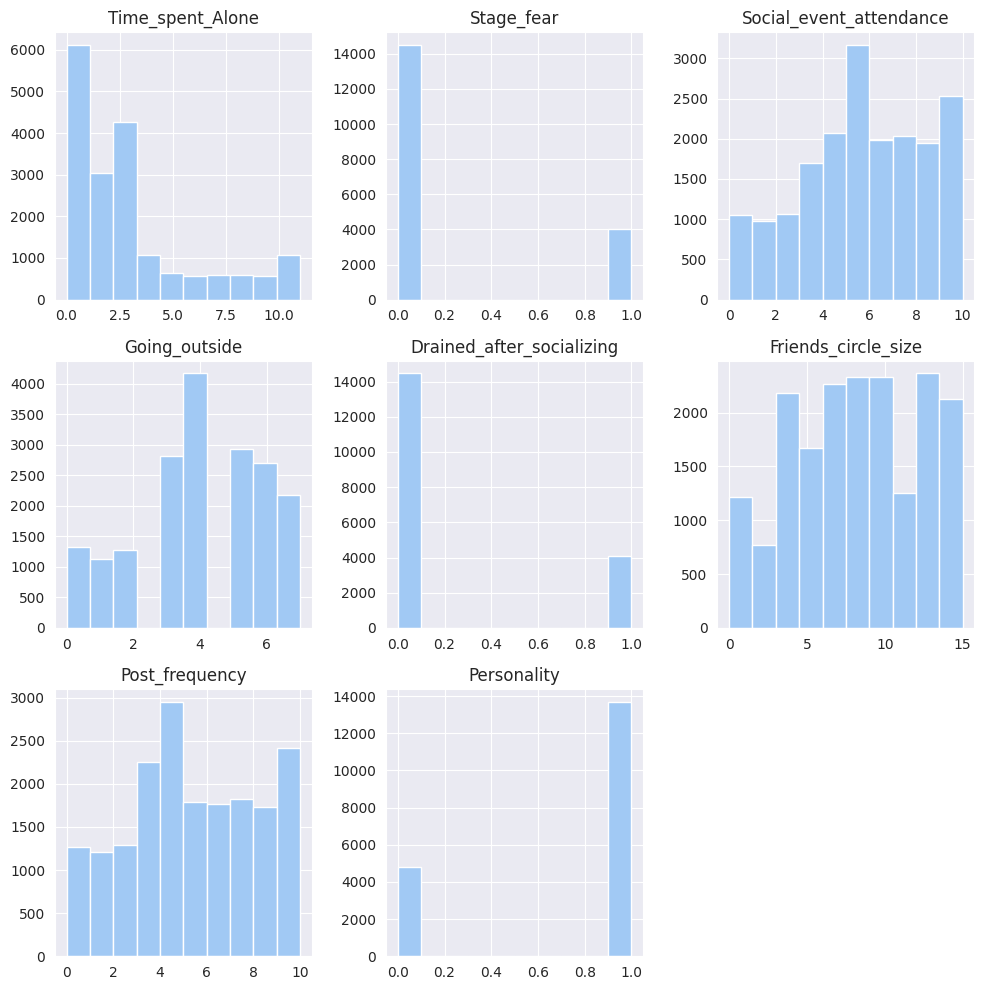

In [11]:
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

## Разделение датасета на тренировочную и тестовую выборки

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Personality', axis=1)
y = df['Personality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Масштабирование данных

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение модели LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [20]:
logistic_model = LogisticRegression()
parametrs = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'class_weight': ['balanced']}

In [21]:
grid_search_clf_1 = GridSearchCV(logistic_model, parametrs, cv=5)
grid_search_clf_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [26]:
logistic_best_model = grid_search_clf_1.best_estimator_

In [27]:
y_pred = logistic_best_model.predict(X_test_scaled)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



## Обучение модели RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 5), 'min_samples_leaf': range(2, 5), 'min_samples_split': range(2, 5)}
grid_search_clf_2 = GridSearchCV(RandomForestClassifier(), parametrs, cv=5, verbose=1)

In [52]:
grid_search_clf_2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5)},
             verbose=1)

In [53]:
best_random_forest_model = grid_search_clf_2.best_estimator_

In [54]:
y_pred_2 = best_random_forest_model.predict(X_test_scaled)

In [55]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



## Обучение модели XGBClassifier

In [68]:
from xgboost import XGBClassifier

In [69]:
parametrs = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': range(1, 5)}
grid_search_clf_3 = GridSearchCV(XGBClassifier(), parametrs, cv=5, verbose=1)

In [70]:
grid_search_clf_3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': range(1, 5),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [71]:
best_xgbclf_model = grid_search_clf_3.best_estimator_

In [72]:
y_pred_3 = best_xgbclf_model.predict(X_test_scaled)

In [73]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



## Kaggle submission

In [74]:
df_test = pd.read_csv('test.csv', index_col='id')
df_test

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,
18524,3.0,No,7.0,4.0,No,6.0,NaN
18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
18526,3.0,No,5.0,6.0,No,15.0,9.0
18527,3.0,No,4.0,4.0,No,5.0,6.0
18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...
24694,3.0,No,5.0,5.0,No,9.0,6.0
24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
24696,2.0,No,4.0,3.0,No,9.0,7.0


In [75]:
df_test[categorical_cols[:-1]] = df_test[categorical_cols[:-1]].apply(lambda col: col.map(dic))

In [76]:
df_test.isna().sum()

,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [77]:
df_test[categorical_cols[:-1]] = df_test[categorical_cols[:-1]].apply(lambda col: col.fillna(col.mode()[0]))
df_test[numeric_cols] = df_test[numeric_cols].apply(lambda col: col.fillna(col.mean()))

In [78]:
df_test.isna().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0


In [79]:
df_test_scaled = scaler.transform(df_test)

In [80]:
df_test_scaled

array([[-0.05327402, -0.52740982,  0.65708026, ..., -0.53127505,
        -0.48935939,  0.02237905],
       [-0.01307595,  1.89605874, -1.96484857, ...,  1.88226418,
        -0.73281312, -1.42967906],
       [-0.05327402, -0.52740982, -0.09204226, ..., -0.53127505,
         1.70172413,  1.45356402],
       ...,
       [-0.39723069, -0.52740982, -0.46660352, ..., -0.53127505,
         0.24100178,  0.73275325],
       [-0.05327402, -0.52740982, -0.46660352, ..., -0.53127505,
         0.72790923,  1.45356402],
       [-0.01307595,  1.89605874, -1.59028731, ...,  1.88226418,
        -1.70662802, -1.79008444]])

In [81]:
df_test_prediction = best_xgbclf_model.predict(df_test_scaled)

In [82]:
inverse_dic = {v: k for k, v in dic_2.items()}
inverse_dic

{1: 'Extrovert', 0: 'Introvert'}

In [83]:
df_test_prediction_encoded = [inverse_dic[val] for val in df_test_prediction]

In [84]:
submission_df = pd.DataFrame(data=df_test_prediction_encoded, index=df_test.index, columns=['Personality'])

In [85]:
submission_df.to_csv('submission_4.csv')